### Column Descriptors
InvoiceNo: Invoice number. Nominal. A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation. <br>
StockCode: Product (item) code. Nominal. A 5-digit integral number uniquely assigned to each distinct product. <br>
Description: Product (item) name. Nominal. <br>
Quantity: The quantities of each product (item) per transaction. Numeric. <br>
InvoiceDate: Invice date and time. Numeric. The day and time when a transaction was generated. <br>
UnitPrice: Unit price. Numeric. Product price per unit in sterling (Â£). <br>
CustomerID: Customer number. Nominal. A 5-digit integral number uniquely assigned to each customer. <br>
Country: Country name. Nominal. The name of the country where a customer resides. <br>

### 1. Load The Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load dataset
df = pd.read_csv('C:/Users/vumac/Desktop/Springboard_Capstone3/Dataset/Year 2010-2011.csv', encoding= 'unicode_escape')

In [3]:
# check shape
df.shape

(541910, 8)

In [4]:
# first 5 rows
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [5]:
# info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
# Convert InvoiceDate to datetime object
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate).dt.date

### 2. Missing Values

In [7]:
# Number of missing values by columns
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [8]:
# All rows missing values in Descirption were also missed values in Customer ID
df[df.Description.isnull()].isnull().sum()

Invoice           0
StockCode         0
Description    1454
Quantity          0
InvoiceDate       0
Price             0
Customer ID    1454
Country           0
dtype: int64

In [9]:
# 25% of the dataset was missing 'Customer ID'
df['Customer ID'].isnull().sum() / len(df) * 100

24.92664833643963

In [10]:
# There are more than 4000 unique customers in the datasets. 
df['Customer ID'].nunique()

4372

In [11]:
# There is no appropriate way to fill the missing value in the 'Customer ID' column 
# We will delete the rows with missing values
# Although we deleted 25% of data, there are still 400,000 rows 
df = df.dropna()
df.shape

(406830, 8)

### 3. Categorical features

#### 3.1 Invoice

In [12]:
# If Invoice starts with the letter 'c', it indicates a cancellation.
df[df["Invoice"].str.contains("C")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
141,C536379,D,Discount,-1,2010-12-01,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01,0.29,17548.0,United Kingdom


In [13]:
# We will delete cancellation invoices

df = df[~df["Invoice"].str.contains("C", na=False)]
df.shape

(397925, 8)

#### 3.2 StockCode

In [14]:
# There are more than 3600 unique items sold
df.StockCode.nunique()

3665

#### 3.3 Description

In [15]:
# There are 3877 unique Description, close to the number of unique StockCode
df.Description.nunique()

3877

#### 3.4 InvoiceDate

In [16]:
# The dataset contained sale data from 2010-12-01 to 2011-12-09
df.InvoiceDate.min(), df.InvoiceDate.max()

(datetime.date(2010, 12, 1), datetime.date(2011, 12, 9))

#### 3.5 Country

In [17]:
# The company sold to 37 countries
df.Country.nunique()

37

In [18]:
# UK was the primary market
df.Country.value_counts().head()

United Kingdom    354345
Germany             9042
France              8343
EIRE                7238
Spain               2485
Name: Country, dtype: int64

In [19]:
# 89% sale orders were from UK market
df.Country.value_counts().head(1) / len(df) * 100

United Kingdom    89.048187
Name: Country, dtype: float64

#### 3.6 Customer ID

In [20]:
# There are 4,339 unique customers
df['Customer ID'].nunique()

4339

### 4. Numerical features


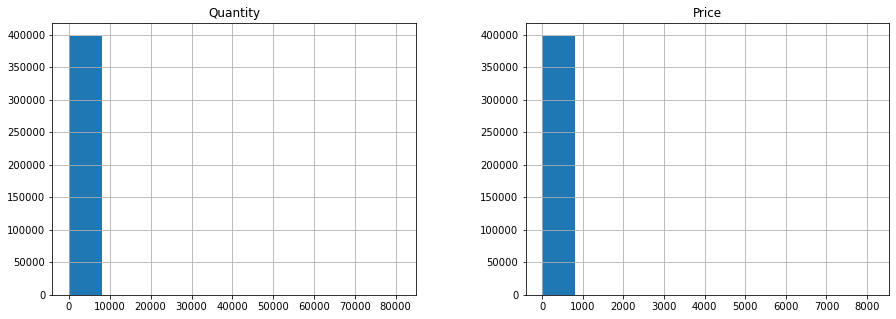

In [21]:
# Explore numerical features' distribution
df[['Quantity', 'Price']].hist(figsize=(15, 5))
plt.subplots_adjust(hspace=0.5)

#### 4.1 Quantity

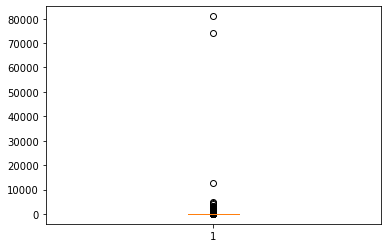

In [22]:
# There are some outliers
plt.boxplot(df.Quantity);

In [23]:
# The minimum order is 1
df.Quantity.min()

1

In [24]:
# 99 percentile of Quantity values
df.Quantity.quantile(0.99)

120.0

In [25]:
# Trim outliers
df = df[df.Quantity <= 120]

#### 4.2 Price

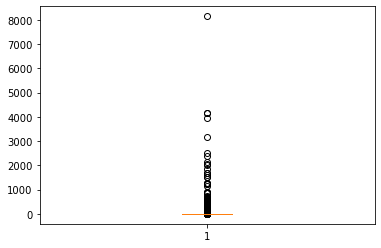

In [26]:
# There are some outliers
plt.boxplot(df.Price);

In [27]:
# 99 percentile of Quantity values
df.Price.quantile(0.99)

14.95

In [28]:
# Trim outliers
df = df[df.Price < 15]

In [29]:
# min Price is 0, they may be promotional products
df.Price.min()

0.0

In [30]:
# Remove sale order with sale price equal to 0
df = df[df.Price > 0]

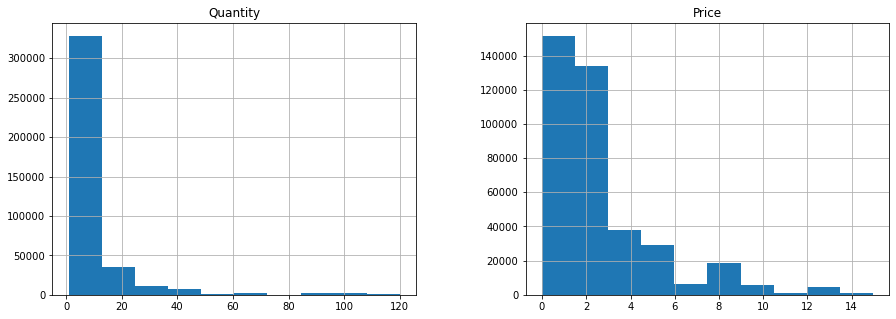

In [31]:
# Examine numerical features' distribution again
df[['Quantity', 'Price']].hist(figsize=(15, 5))
plt.subplots_adjust(hspace=0.5)

### 5. Save Data

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390263 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      390263 non-null  object 
 1   StockCode    390263 non-null  object 
 2   Description  390263 non-null  object 
 3   Quantity     390263 non-null  int64  
 4   InvoiceDate  390263 non-null  object 
 5   Price        390263 non-null  float64
 6   Customer ID  390263 non-null  float64
 7   Country      390263 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 26.8+ MB


In [33]:
df.shape

(390263, 8)

In [34]:
df.to_csv('C:/Users/vumac/Desktop/Springboard_Capstone3/Dataset/online_retail_cleaned.csv')